### Importing the Necessary Packages

In [1]:
import sys, os
import warnings

### Setting the Path for the Script

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
import preprocessing as prep
import eda

# Fraud Detection Project
In this notebook, we will preprocess the data, perform exploratory data analysis, feature engineering, and train a fraud detection model for e-commerce and bank transactions.

## 1. Load Data


In [4]:
filepath1 = r'C:\Users\Blen\OneDrive\Documents\10Academy\Week8&9\Data\Fraud_data.csv'
filepath2 = r'C:\Users\Blen\OneDrive\Documents\10Academy\Week8&9\Data\IpAddress_to_Country.csv'

In [5]:

fraud_data, ip_country_data = prep.load_data(filepath1, filepath2)

## 2. Overview of the Data

In [6]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [9]:
ip_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [10]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## 3. Preprocessing the Data

### 3.1 Cleaning the dataset to remove duplicates and to convert date related columns to a standard date-time format

In [11]:
fraud_data = prep.clean_data(fraud_data)

### 3.2 Converting the ip column in the fraud dataset to a standard integer format

In [12]:
fraud_data = prep.convert_ip_to_int(fraud_data)

### 3.3 Merging the fraud dataset with the ip dataset using range-based mechanism

In [13]:
fraud_data_merged = prep.merge_ip_country(fraud_data, ip_country_data)

In [14]:
fraud_data_merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:00,2015-08-09 03:57:00,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:00,2015-02-11 20:28:00,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:00,2015-04-11 23:41:00,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:00,2015-05-23 16:40:00,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:00,2015-11-03 04:04:00,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [15]:
fraud_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 129146 non-null  int64         
 1   signup_time             129146 non-null  datetime64[ns]
 2   purchase_time           129146 non-null  datetime64[ns]
 3   purchase_value          129146 non-null  int64         
 4   device_id               129146 non-null  object        
 5   source                  129146 non-null  object        
 6   browser                 129146 non-null  object        
 7   sex                     129146 non-null  object        
 8   age                     129146 non-null  int64         
 9   ip_address              129146 non-null  int64         
 10  class                   129146 non-null  int64         
 11  lower_bound_ip_address  129146 non-null  float64       
 12  upper_bound_ip_address  129146 no

## 4. Feature Engineering

In [16]:
fraud_data_merged = prep.add_transaction_features(fraud_data_merged)

In [17]:
fraud_data_aggregated = prep.add_velocity_features(fraud_data_merged)

In [18]:
fraud_data_merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_time_diff(hours),hour_of_day,day_of_week
634,247547,2015-06-28 03:00:00,2015-08-09 03:57:00,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia,1008.950000,3,6
635,220737,2015-01-28 14:21:00,2015-02-11 20:28:00,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand,342.116667,20,2
636,390400,2015-03-19 20:49:00,2015-04-11 23:41:00,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China,554.866667,23,5
637,69592,2015-02-24 06:11:00,2015-05-23 16:40:00,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China,2122.483333,16,5
638,174987,2015-07-07 12:58:00,2015-11-03 04:04:00,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand,2847.100000,4,1


In [19]:
fraud_data_merged.nunique()

user_id                         129146
signup_time                     116742
purchase_time                   106332
purchase_value                     122
device_id                       118434
source                               3
browser                              5
sex                                  2
age                                 56
ip_address                      122499
class                                2
lower_bound_ip_address           25804
upper_bound_ip_address           25804
country                            181
transaction_time_diff(hours)     87816
hour_of_day                         24
day_of_week                          7
dtype: int64

## 5. Extracted a Dataframe that Contains Information Related to Duplicated IP's

In [20]:
duplicated_ips = prep.check_duplicated_ips(fraud_data_merged)

In [21]:
duplicated_ips.head()

,ip_address,total_purchase_amount,purchase_count,country,fraud_class
48,18191460,90,6,Japan,1
327,25848218,189,7,Australia,1
547,31681698,532,14,Korea Republic of,1
676,35100050,128,8,European Union,1
831,39439193,280,10,Saudi Arabia,1


In [22]:
duplicated_ips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 48 to 122016
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ip_address             661 non-null    int64 
 1   total_purchase_amount  661 non-null    int64 
 2   purchase_count         661 non-null    int64 
 3   country                661 non-null    object
 4   fraud_class            661 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 31.0+ KB


In [23]:
duplicated_ips.nunique()

ip_address               661
total_purchase_amount    308
purchase_count            18
country                   59
fraud_class                2
dtype: int64

# Exploratory Data Analysis (EDA)
We will now explore the data to gain insights and identify patterns related to fraudulent transactions.


## 1. Univariate Analysis

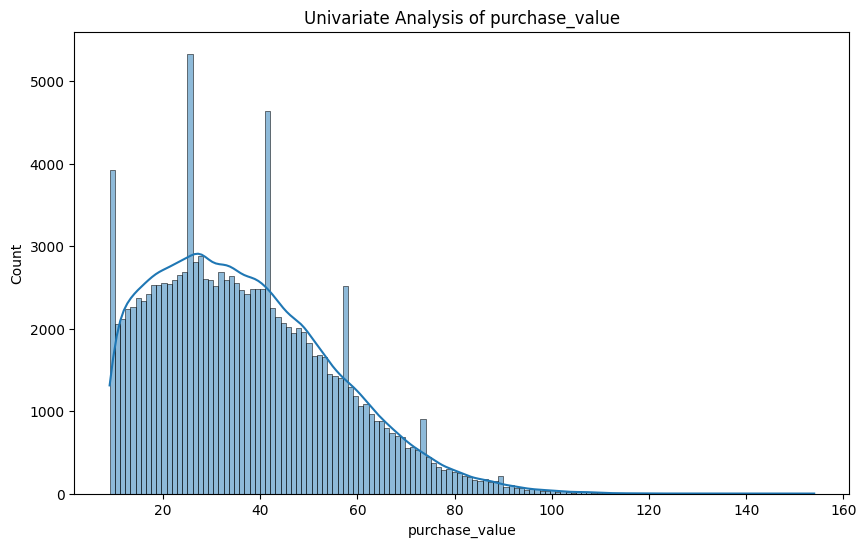

In [24]:
eda.univariate_analysis(fraud_data_merged, 'purchase_value')

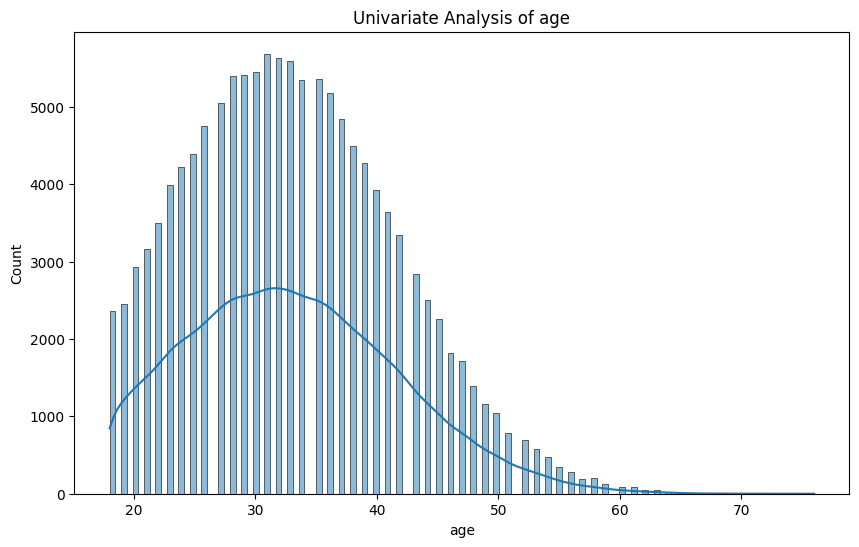

In [25]:
eda.univariate_analysis(fraud_data_merged, 'age')

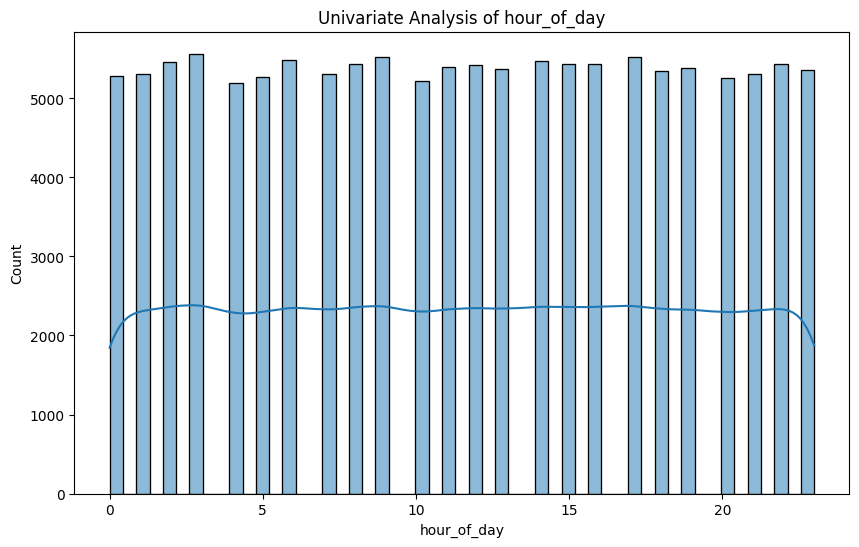

In [26]:
eda.univariate_analysis(fraud_data_merged, 'hour_of_day')

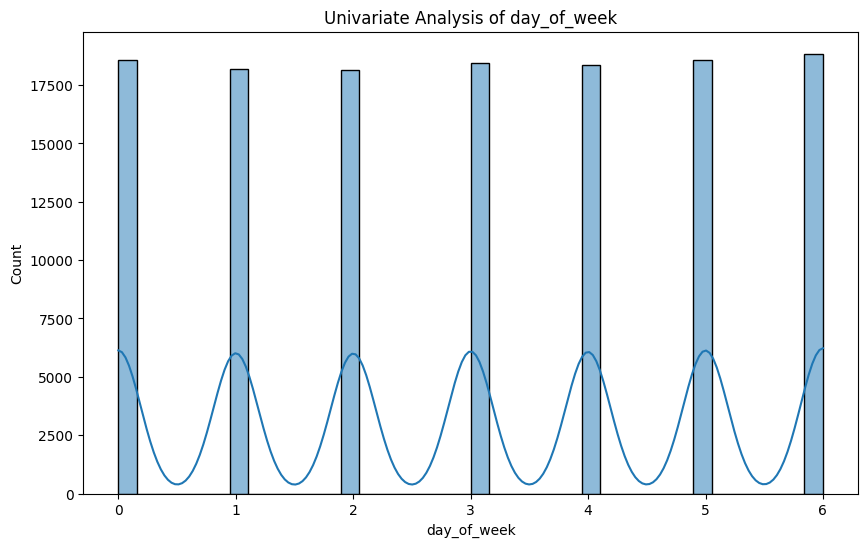

In [27]:
eda.univariate_analysis(fraud_data_merged, 'day_of_week')

c:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\scripts\eda.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


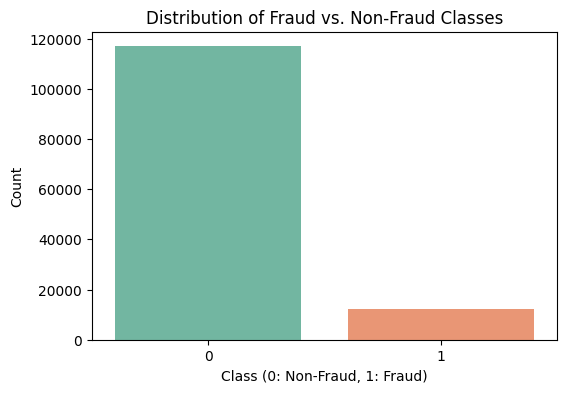

In [28]:
eda.plot_class_distribution(fraud_data_merged)

## 2. Bivariate Analysis

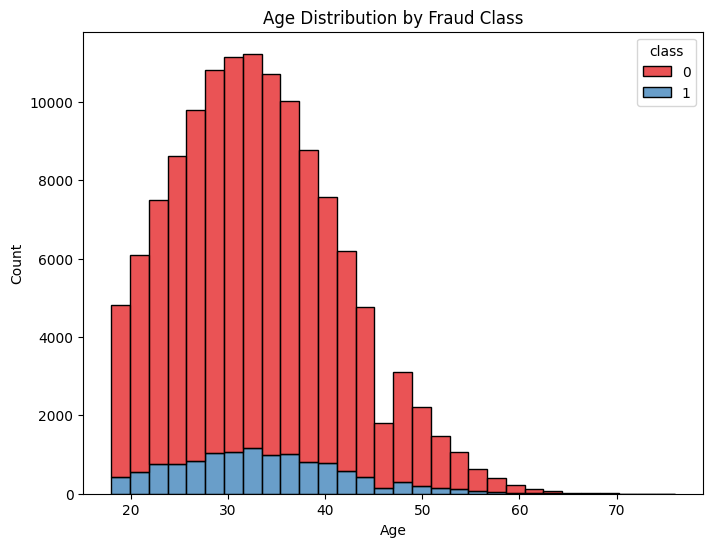

In [29]:
eda.plot_age_distribution_by_class(fraud_data_merged)

c:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\scripts\eda.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='purchase_value', data=df, palette='Set1')


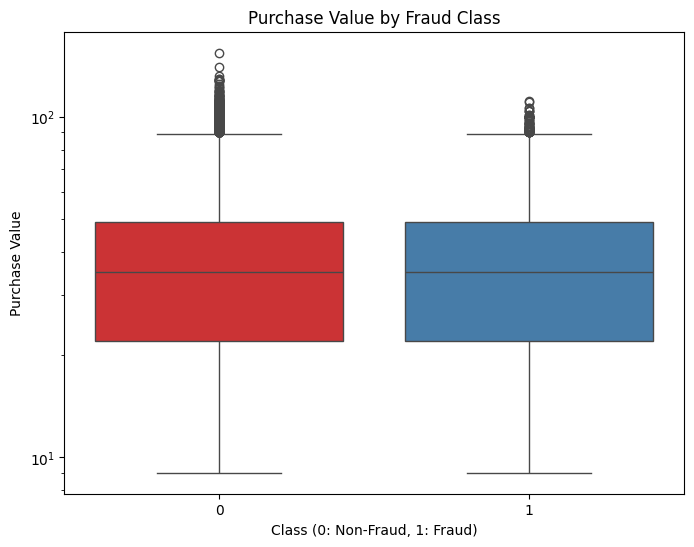

In [30]:
eda.plot_purchase_value_by_class(fraud_data_merged)

c:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\scripts\eda.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='transaction_time_diff(hours)', data=df, palette='Set3')


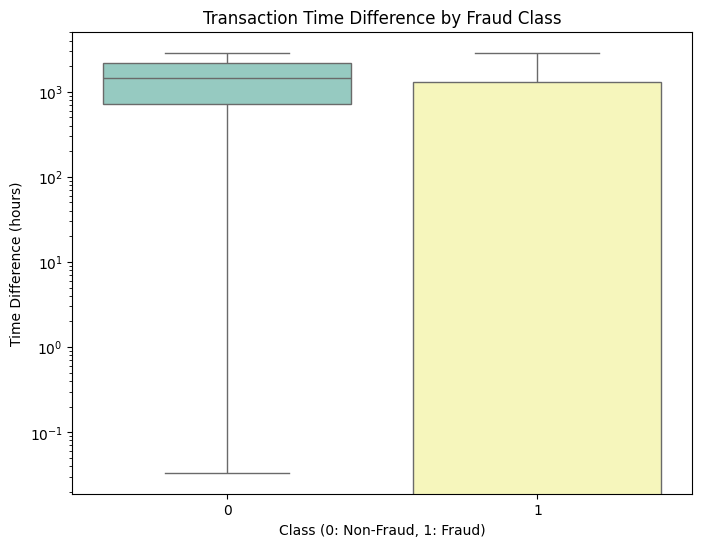

In [31]:
eda.plot_transaction_time_diff_by_class(fraud_data_merged)

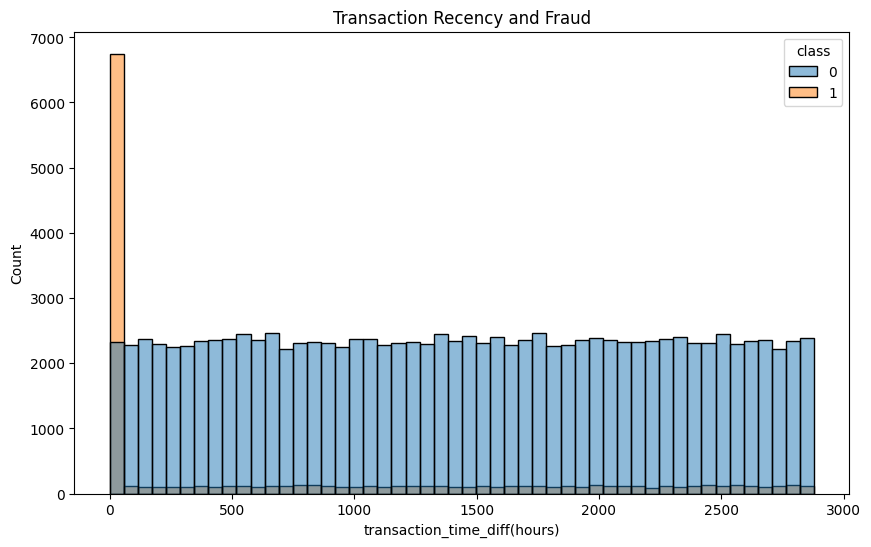

In [32]:
eda.transaction_recency_analysis(fraud_data_merged)

<Figure size 1200x600 with 0 Axes>

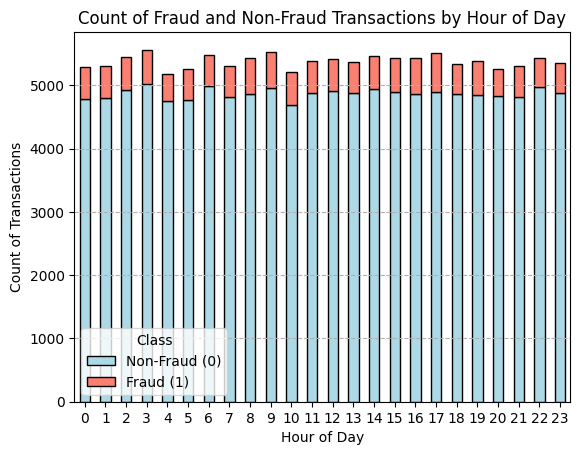

In [33]:
eda.plot_hour_class_relationship(fraud_data_merged)

<Figure size 1200x600 with 0 Axes>

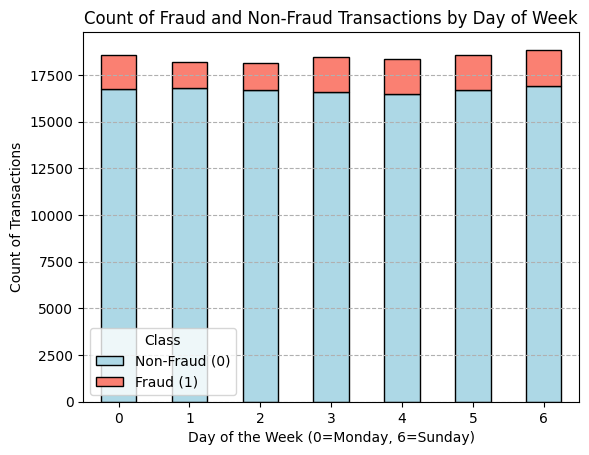

In [37]:
eda.plot_day_class_relationship(fraud_data_merged)

## 3. Geolocation Analysis

c:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\scripts\eda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_fraud_counts.values, y=country_fraud_counts.index, palette='viridis')


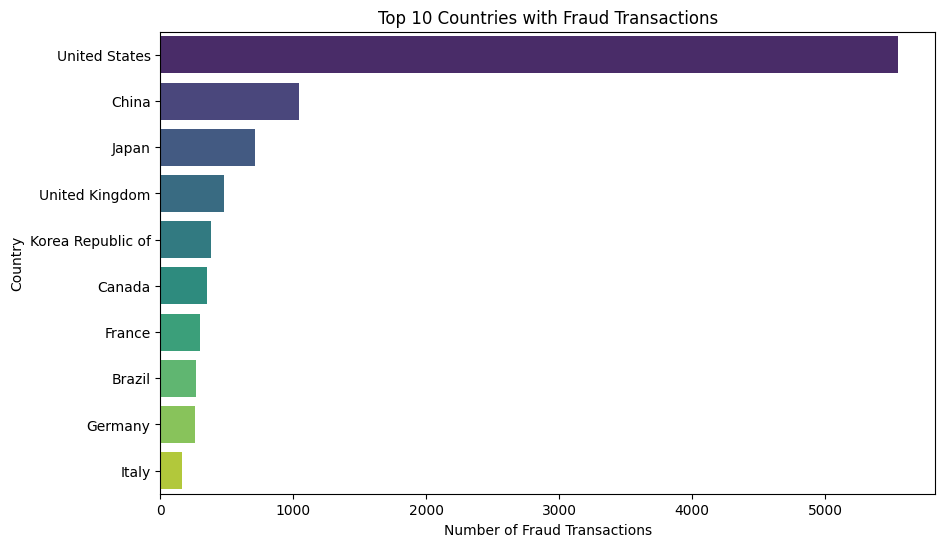

In [34]:
eda.plot_top_fraud_countries(fraud_data_merged)

## 4. Correlation Between Features

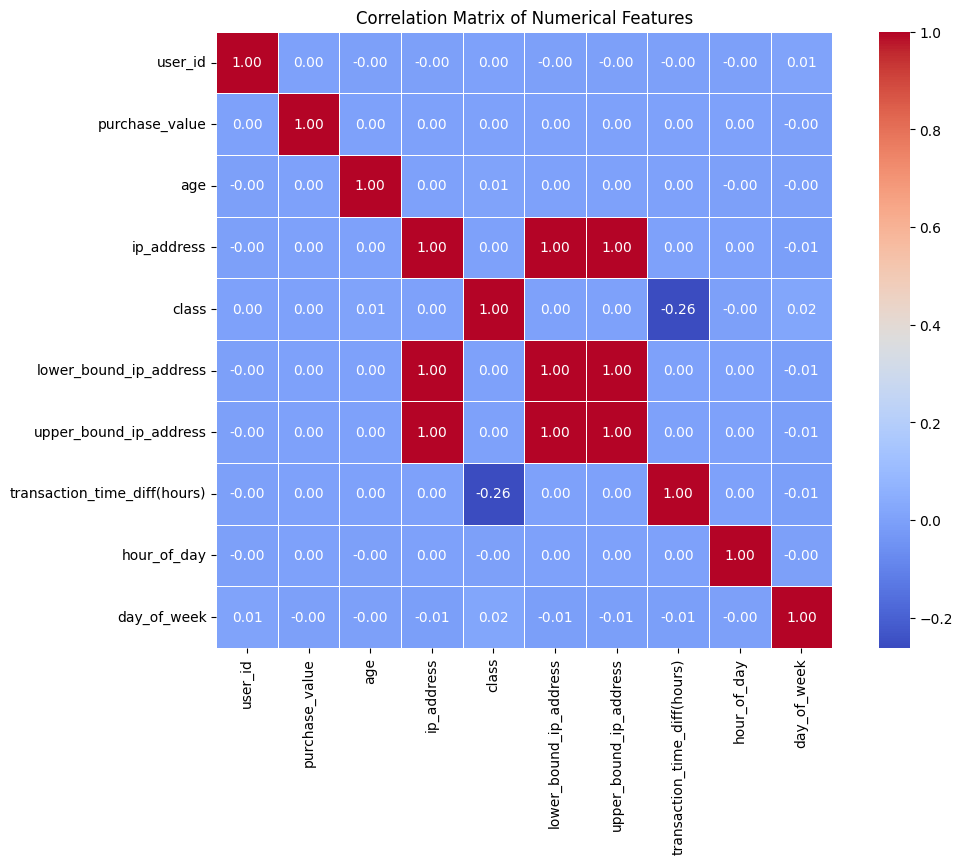

In [35]:
eda.plot_correlation_matrix(fraud_data_merged)

# Scaling and Encoding

In [38]:
fraud_data_scaled = prep.scale_features(fraud_data_merged, ['purchase_value', 'transaction_time_diff(hours)'])

In [39]:
fraud_data_scaled = prep.encode_categorical(fraud_data_scaled)

# Saving the Merged Data

In [40]:
prep.save_merged_data(fraud_data_scaled)